# PANDAS TUTORIAL (QUICK TOUR-10 MINUTES)

This is a short introduction to `pandas`, geared mainly for new users.

Customarily, we import as follow:

In [142]:
import numpy as np
import pandas as pd

## Object Creation

Creating a **Series** by passing a list of values, letting `pandas` create a default integer index.

In [143]:
s = pd.Series([1, 2, -7, 10, np.nan, 8, 11])
s

0     1.0
1     2.0
2    -7.0
3    10.0
4     NaN
5     8.0
6    11.0
dtype: float64

Creating a **DataFrame** by passing a `NumPy` array, with datetime index and labeled columns.

In [144]:
dates = pd.date_range("20220319", periods=7)
dates

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [145]:
df = pd.DataFrame(np.random.randn(7, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2022-03-19,-1.370936,0.828465,0.124931,0.354326
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965
2022-03-21,1.040607,-0.493101,0.388606,-1.737725
2022-03-22,0.023606,0.074060,-1.381514,0.040596
2022-03-23,0.274494,2.002711,-1.394453,-0.353680
2022-03-24,1.614543,0.490424,-0.079126,-1.592536
2022-03-25,0.703677,0.660387,-1.082362,1.114171


Create a **DataFrame** by passing a *dictionary* of objects that can be converted into a series-like structure.

In [146]:
df2 = pd.DataFrame(
    {
        "A": 1.5,
        "B": pd.Timestamp("20220319"),
        "C": pd.Series(1, index=list(range(4)), dtype=np.float32),
        "D": np.array([5] * 4, dtype=np.int32),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.5,2022-03-19,1.0,5,test,foo
1,1.5,2022-03-19,1.0,5,train,foo
2,1.5,2022-03-19,1.0,5,test,foo
3,1.5,2022-03-19,1.0,5,train,foo


The columns of the resulting **DataFrame** have different `dtypes`.

In [147]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

Here is how to view the top and bottom rows of the frame.

In [148]:
df.head()

,A,B,C,D
2022-03-19,-1.370936,0.828465,0.124931,0.354326
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965
2022-03-21,1.040607,-0.493101,0.388606,-1.737725
2022-03-22,0.023606,0.074060,-1.381514,0.040596
2022-03-23,0.274494,2.002711,-1.394453,-0.353680


In [149]:
df.tail()

,A,B,C,D
2022-03-21,1.040607,-0.493101,0.388606,-1.737725
2022-03-22,0.023606,0.074060,-1.381514,0.040596
2022-03-23,0.274494,2.002711,-1.394453,-0.353680
2022-03-24,1.614543,0.490424,-0.079126,-1.592536
2022-03-25,0.703677,0.660387,-1.082362,1.114171


> You can pass arguments to the `head()` or `tail()` functions to display a specified number of rows.

In [150]:
df.head(2)

,A,B,C,D
2022-03-19,-1.370936,0.828465,0.124931,0.354326
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965


Display the index, columns.

In [151]:
df.index

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [152]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

> `DataFrame.to_numpy()` gives a `NumPy` representation of the underlying data. Note that this can be an expensive operation when your `DataFrame` has columns with *different* data types, which comes down to a fundamental difference between pandas and `NumPy`: `NumPy` arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call `DataFrame.to_numpy()`, pandas will find the `NumPy` dtype that can hold all of the dtypes in the `DataFrame`. This may end up being object, which requires casting every value to a Python object.

For `df`, our **DataFrame** of all floating-point values, `DataFrame.to_numpy()` is fast and doesn't require copying data

In [153]:
df.to_numpy()

array([[-1.37093563,  0.82846476,  0.12493118,  0.35432631],
       [-0.2977622 ,  1.10423194, -0.70370175, -1.94296494],
       [ 1.0406066 , -0.49310059,  0.38860601, -1.73772458],
       [ 0.02360649,  0.07406038, -1.38151358,  0.04059579],
       [ 0.27449383,  2.00271148, -1.39445297, -0.35367973],
       [ 1.61454257,  0.4904236 , -0.07912624, -1.59253649],
       [ 0.70367735,  0.6603868 , -1.08236205,  1.11417122]])

For `df2`, the **DataFrame** with multiply `dtypes`, `DataFrame.to_numpy()` is relative expensive.

In [154]:
df2.to_numpy()

array([[1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo']],
      dtype=object)

`describe()` shows a quick statistic summary of your data.

In [155]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,0.284033,0.666740,-0.589660,-0.588259
std,0.971604,0.788459,0.736973,1.183378
min,-1.370936,-0.493101,-1.394453,-1.942965
25%,-0.137078,0.282242,-1.231938,-1.665131
50%,0.274494,0.660387,-0.703702,-0.353680
75%,0.872142,0.966348,0.022902,0.197461
max,1.614543,2.002711,0.388606,1.114171


In [156]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.5,1.0,5.0
std,0.0,0.0,0.0
min,1.5,1.0,5.0
25%,1.5,1.0,5.0
50%,1.5,1.0,5.0
75%,1.5,1.0,5.0
max,1.5,1.0,5.0


Transposing your data.

In [157]:
df.T

,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25
A,-1.370936,-0.297762,1.040607,0.023606,0.274494,1.614543,0.703677
B,0.828465,1.104232,-0.493101,0.074060,2.002711,0.490424,0.660387
C,0.124931,-0.703702,0.388606,-1.381514,-1.394453,-0.079126,-1.082362
D,0.354326,-1.942965,-1.737725,0.040596,-0.353680,-1.592536,1.114171


Sorting by an **axis**

In [158]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2022-03-25,0.703677,0.660387,-1.082362,1.114171
2022-03-24,1.614543,0.490424,-0.079126,-1.592536
2022-03-23,0.274494,2.002711,-1.394453,-0.353680
2022-03-22,0.023606,0.074060,-1.381514,0.040596
2022-03-21,1.040607,-0.493101,0.388606,-1.737725
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965
2022-03-19,-1.370936,0.828465,0.124931,0.354326


In [159]:
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2022-03-19,0.354326,0.124931,0.828465,-1.370936
2022-03-20,-1.942965,-0.703702,1.104232,-0.297762
2022-03-21,-1.737725,0.388606,-0.493101,1.040607
2022-03-22,0.040596,-1.381514,0.074060,0.023606
2022-03-23,-0.353680,-1.394453,2.002711,0.274494
2022-03-24,-1.592536,-0.079126,0.490424,1.614543
2022-03-25,1.114171,-1.082362,0.660387,0.703677


Sorting by values.

In [160]:
df.sort_values(by="B")

,A,B,C,D
2022-03-21,1.040607,-0.493101,0.388606,-1.737725
2022-03-22,0.023606,0.074060,-1.381514,0.040596
2022-03-24,1.614543,0.490424,-0.079126,-1.592536
2022-03-25,0.703677,0.660387,-1.082362,1.114171
2022-03-19,-1.370936,0.828465,0.124931,0.354326
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965
2022-03-23,0.274494,2.002711,-1.394453,-0.353680


## Selection

### Getting

Selecting a single column, which yeild a `Series`, equivalent to `df.A`.

In [161]:
print("df.A", df.A, sep="\n")
print("="*30)
print("df[\"A\"]", df["A"], sep="\n")

df.A
2022-03-19   -1.370936
2022-03-20   -0.297762
2022-03-21    1.040607
2022-03-22    0.023606
2022-03-23    0.274494
2022-03-24    1.614543
2022-03-25    0.703677
Freq: D, Name: A, dtype: float64
df["A"]
2022-03-19   -1.370936
2022-03-20   -0.297762
2022-03-21    1.040607
2022-03-22    0.023606
2022-03-23    0.274494
2022-03-24    1.614543
2022-03-25    0.703677
Freq: D, Name: A, dtype: float64


Selecting via `[]`, which slicing the rows.

In [162]:
df[0:3]

,A,B,C,D
2022-03-19,-1.370936,0.828465,0.124931,0.354326
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965
2022-03-21,1.040607,-0.493101,0.388606,-1.737725


In [163]:
df["20220319":"20220321"]

,A,B,C,D
2022-03-19,-1.370936,0.828465,0.124931,0.354326
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965
2022-03-21,1.040607,-0.493101,0.388606,-1.737725


## Selection by label

For getting a cross section using a label.

In [164]:
df.loc[dates[0]]

A   -1.370936
B    0.828465
C    0.124931
D    0.354326
Name: 2022-03-19 00:00:00, dtype: float64

Selecting on a multi-axis by label.

In [165]:
df.loc[:, ["A", "B"]]

,A,B
2022-03-19,-1.370936,0.828465
2022-03-20,-0.297762,1.104232
2022-03-21,1.040607,-0.493101
2022-03-22,0.023606,0.074060
2022-03-23,0.274494,2.002711
2022-03-24,1.614543,0.490424
2022-03-25,0.703677,0.660387


Showing label slicing, both endpoints are included.

In [166]:
df.loc["20220319":"20220321", ["C", "D"]]

,C,D
2022-03-19,0.124931,0.354326
2022-03-20,-0.703702,-1.942965
2022-03-21,0.388606,-1.737725


Reduction in the dimensions of returned object.

In [167]:
df.loc["20220324", ["B", "C"]]

B    0.490424
C   -0.079126
Name: 2022-03-24 00:00:00, dtype: float64

For getting a scalar value.

In [168]:
df.loc[dates[1], "A"]

-0.29776219892726247

For getting fast access to a scalar (equivalent to the prior method).

In [169]:
df.at[dates[1], "A"]

-0.29776219892726247

## Selection by position

Select via the position of the passed integers.

In [170]:
df.iloc[3]
# equivalent to df.loc[dates[3]]

A    0.023606
B    0.074060
C   -1.381514
D    0.040596
Name: 2022-03-22 00:00:00, dtype: float64

By integer slices, acting similar to `Numpy/Python`.

In [171]:
df.iloc[3:5, 0:2]
# equivalent to df.loc["20220322":"20220323", ["A", "B"]]

,A,B
2022-03-22,0.023606,0.074060
2022-03-23,0.274494,2.002711


By list of integer position locations, similar to the `Numpy/Python` style.

In [172]:
df.iloc[[1, 2, 4], [0, 2]]
# equivalent to df.loc["20220320":"20220323", ["B", "C"]]

,A,C
2022-03-20,-0.297762,-0.703702
2022-03-21,1.040607,0.388606
2022-03-23,0.274494,-1.394453


For slicing rows explicitly.

In [173]:
df.iloc[1:3, :]

,A,B,C,D
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965
2022-03-21,1.040607,-0.493101,0.388606,-1.737725


For slicing columns explicitly.

In [174]:
df.iloc[:, 1:3]

,B,C
2022-03-19,0.828465,0.124931
2022-03-20,1.104232,-0.703702
2022-03-21,-0.493101,0.388606
2022-03-22,0.074060,-1.381514
2022-03-23,2.002711,-1.394453
2022-03-24,0.490424,-0.079126
2022-03-25,0.660387,-1.082362


For getting a value explicitly.

In [175]:
df.iloc[1, 1]

1.1042319388398925

For getting fast access to a scalar (equivalent to the prior method).

In [176]:
df.iat[1, 1]

1.1042319388398925

## Boolean indexing

Using a single column's values to select data.

In [177]:
df[df["A"] > 0]

,A,B,C,D
2022-03-21,1.040607,-0.493101,0.388606,-1.737725
2022-03-22,0.023606,0.074060,-1.381514,0.040596
2022-03-23,0.274494,2.002711,-1.394453,-0.353680
2022-03-24,1.614543,0.490424,-0.079126,-1.592536
2022-03-25,0.703677,0.660387,-1.082362,1.114171


Selecting values from a **DataFrame** where a boolean condition is met.

In [178]:
df[df > 0]

,A,B,C,D
2022-03-19,NaN,0.828465,0.124931,0.354326
2022-03-20,NaN,1.104232,NaN,NaN
2022-03-21,1.040607,NaN,0.388606,NaN
2022-03-22,0.023606,0.074060,NaN,0.040596
2022-03-23,0.274494,2.002711,NaN,NaN
2022-03-24,1.614543,0.490424,NaN,NaN
2022-03-25,0.703677,0.660387,NaN,1.114171


Using `isin()` method for filtering.

In [179]:
df_copy = df.copy()
df_copy["E"] = ["one", "two", "three", "four", "five", "six", "seven"]
df_copy

,A,B,C,D,E
2022-03-19,-1.370936,0.828465,0.124931,0.354326,one
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965,two
2022-03-21,1.040607,-0.493101,0.388606,-1.737725,three
2022-03-22,0.023606,0.074060,-1.381514,0.040596,four
2022-03-23,0.274494,2.002711,-1.394453,-0.353680,five
2022-03-24,1.614543,0.490424,-0.079126,-1.592536,six
2022-03-25,0.703677,0.660387,-1.082362,1.114171,seven


In [180]:
df_copy[df_copy["E"].isin(["three", "six"])]

,A,B,C,D,E
2022-03-21,1.040607,-0.493101,0.388606,-1.737725,three
2022-03-24,1.614543,0.490424,-0.079126,-1.592536,six


## Setting

Setting a new column automatically aligns the data by the indexes.

In [181]:
s1 = pd.Series(list(range(1, 8)), index=pd.date_range("20220319", periods=7))
s1

2022-03-19    1
2022-03-20    2
2022-03-21    3
2022-03-22    4
2022-03-23    5
2022-03-24    6
2022-03-25    7
Freq: D, dtype: int64

In [182]:
df["F"] = s1
df

,A,B,C,D,F
2022-03-19,-1.370936,0.828465,0.124931,0.354326,1
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965,2
2022-03-21,1.040607,-0.493101,0.388606,-1.737725,3
2022-03-22,0.023606,0.074060,-1.381514,0.040596,4
2022-03-23,0.274494,2.002711,-1.394453,-0.353680,5
2022-03-24,1.614543,0.490424,-0.079126,-1.592536,6
2022-03-25,0.703677,0.660387,-1.082362,1.114171,7


Setting values by label.

In [183]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2022-03-19,0.000000,0.828465,0.124931,0.354326,1
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965,2
2022-03-21,1.040607,-0.493101,0.388606,-1.737725,3
2022-03-22,0.023606,0.074060,-1.381514,0.040596,4
2022-03-23,0.274494,2.002711,-1.394453,-0.353680,5
2022-03-24,1.614543,0.490424,-0.079126,-1.592536,6
2022-03-25,0.703677,0.660387,-1.082362,1.114171,7


Setting values by position.

In [184]:
df.iat[0, 1] = 1
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,0.124931,0.354326,1
2022-03-20,-0.297762,1.104232,-0.703702,-1.942965,2
2022-03-21,1.040607,-0.493101,0.388606,-1.737725,3
2022-03-22,0.023606,0.074060,-1.381514,0.040596,4
2022-03-23,0.274494,2.002711,-1.394453,-0.353680,5
2022-03-24,1.614543,0.490424,-0.079126,-1.592536,6
2022-03-25,0.703677,0.660387,-1.082362,1.114171,7


Setting by assigning with a `Numpy` array

In [185]:
df.loc[:, "D"] = np.array(5 * len(df))
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,0.124931,35,1
2022-03-20,-0.297762,1.104232,-0.703702,35,2
2022-03-21,1.040607,-0.493101,0.388606,35,3
2022-03-22,0.023606,0.074060,-1.381514,35,4
2022-03-23,0.274494,2.002711,-1.394453,35,5
2022-03-24,1.614543,0.490424,-0.079126,35,6
2022-03-25,0.703677,0.660387,-1.082362,35,7


## Missing data

`Pandas` primarily uses the value `np.nan` to represent missing data. It is by default not included in computation.

Reindexing allows you to change/add/delete the index on a sepecified axis. This returns a copy of data.

In [186]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,0.124931,35,1,1.0
2022-03-20,-0.297762,1.104232,-0.703702,35,2,1.0
2022-03-21,1.040607,-0.493101,0.388606,35,3,NaN
2022-03-22,0.023606,0.074060,-1.381514,35,4,NaN


To drop any rows that have missing data.

In [187]:
df1.dropna(how="any")

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,0.124931,35,1,1.0
2022-03-20,-0.297762,1.104232,-0.703702,35,2,1.0


Filling missing data.

In [188]:
df1.fillna(value=3)

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,0.124931,35,1,1.0
2022-03-20,-0.297762,1.104232,-0.703702,35,2,1.0
2022-03-21,1.040607,-0.493101,0.388606,35,3,3.0
2022-03-22,0.023606,0.074060,-1.381514,35,4,3.0


To get the boolean mask where values are `nan`.

In [189]:
pd.isna(df1)

,A,B,C,D,F,E
2022-03-19,False,False,False,False,False,False
2022-03-20,False,False,False,False,False,False
2022-03-21,False,False,False,False,False,True
2022-03-22,False,False,False,False,False,True


## Operations

### Stats

Operations in general *exclude* missing data.

Perform a descriptive statistic.

In [190]:
df.mean()

A     0.479881
B     0.691245
C    -0.589660
D    35.000000
F     4.000000
dtype: float64

Same operation on the other axis.

In [191]:
df.mean(1)

2022-03-19    7.424986
2022-03-20    7.420554
2022-03-21    7.787222
2022-03-22    7.543231
2022-03-23    8.176550
2022-03-24    8.605168
2022-03-25    8.456340
Freq: D, dtype: float64

Operation with objects that have different dismensionality and need alignment. In addition, `pandas` automatically broadcast along the specified dimension.

In [192]:
s = pd.Series([1, 3, 5, np.nan, 6, 8, 11], index=dates).shift(2)
s

2022-03-19    NaN
2022-03-20    NaN
2022-03-21    1.0
2022-03-22    3.0
2022-03-23    5.0
2022-03-24    NaN
2022-03-25    6.0
Freq: D, dtype: float64

In [193]:
df.sub(s, axis="index")

,A,B,C,D,F
2022-03-19,NaN,NaN,NaN,NaN,NaN
2022-03-20,NaN,NaN,NaN,NaN,NaN
2022-03-21,0.040607,-1.493101,-0.611394,34.0,2.0
2022-03-22,-2.976394,-2.925940,-4.381514,32.0,1.0
2022-03-23,-4.725506,-2.997289,-6.394453,30.0,0.0
2022-03-24,NaN,NaN,NaN,NaN,NaN
2022-03-25,-5.296323,-5.339613,-7.082362,29.0,1.0


### Apply

Applying functions to the data.

In [194]:
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,0.124931,35,1
2022-03-20,-0.297762,1.104232,-0.703702,35,2
2022-03-21,1.040607,-0.493101,0.388606,35,3
2022-03-22,0.023606,0.074060,-1.381514,35,4
2022-03-23,0.274494,2.002711,-1.394453,35,5
2022-03-24,1.614543,0.490424,-0.079126,35,6
2022-03-25,0.703677,0.660387,-1.082362,35,7


In [195]:
df.apply(np.cumsum)
# equivalent to df.apply(np.cumsum, axis=0)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,0.124931,35,1
2022-03-20,-0.297762,2.104232,-0.578771,70,3
2022-03-21,0.742844,1.611131,-0.190165,105,6
2022-03-22,0.766451,1.685192,-1.571678,140,10
2022-03-23,1.040945,3.687903,-2.966131,175,15
2022-03-24,2.655487,4.178327,-3.045257,210,21
2022-03-25,3.359165,4.838714,-4.127619,245,28


In [196]:
df.apply(np.cumsum, axis=1)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,1.124931,36.124931,37.124931
2022-03-20,-0.297762,0.806470,0.102768,35.102768,37.102768
2022-03-21,1.040607,0.547506,0.936112,35.936112,38.936112
2022-03-22,0.023606,0.097667,-1.283847,33.716153,37.716153
2022-03-23,0.274494,2.277205,0.882752,35.882752,40.882752
2022-03-24,1.614543,2.104966,2.025840,37.025840,43.025840
2022-03-25,0.703677,1.364064,0.281702,35.281702,42.281702


In [197]:
df.apply(lambda x: x.max() - x.min())

A    1.912305
B    2.495812
C    1.783059
D    0.000000
F    6.000000
dtype: float64

In [198]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2022-03-19    35.000000
2022-03-20    35.703702
2022-03-21    35.493101
2022-03-22    36.381514
2022-03-23    36.394453
2022-03-24    35.079126
2022-03-25    36.082362
Freq: D, dtype: float64

### Histogramming

In [199]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    2
2    4
3    2
4    3
5    0
6    1
7    4
8    5
9    3
dtype: int32

In [200]:
s.value_counts()

0    2
2    2
4    2
3    2
1    1
5    1
dtype: int64

### String methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses **regular expressions** by default (and in some cases always uses them).

In [201]:
s = pd.Series(["A", "B", "C", "D", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3       D
4    Aaba
5    Baca
6     NaN
7    CABA
8     dog
9     cat
dtype: object

In [202]:
s.str.lower()

0       a
1       b
2       c
3       d
4    aaba
5    baca
6     NaN
7    caba
8     dog
9     cat
dtype: object

### Merge

#### Concat

`Pandas` provides various facilities for easily combining together `Series` and `DataFrame` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type operations.

Concatenating pandas objects together with `concat()`.

In [203]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.425330,-0.105581,0.003268,-0.039938
1,0.962027,-0.046147,-1.965371,-1.522336
2,-1.310518,0.599702,-0.165153,-1.566402
3,-1.268717,0.480472,0.231030,-2.553027
4,0.945954,-0.819996,1.103783,-0.361828
5,-2.936727,0.175518,0.497883,-0.470735
6,1.086483,-1.005244,0.220241,-0.064859
7,0.892401,-0.815945,0.014378,0.025440
8,1.587064,1.613306,-0.405503,-1.998462
9,-0.385205,-1.630769,0.326832,0.585478


In [204]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.425330 -0.105581  0.003268 -0.039938
 1  0.962027 -0.046147 -1.965371 -1.522336
 2 -1.310518  0.599702 -0.165153 -1.566402,
           0         1         2         3
 3 -1.268717  0.480472  0.231030 -2.553027
 4  0.945954 -0.819996  1.103783 -0.361828
 5 -2.936727  0.175518  0.497883 -0.470735
 6  1.086483 -1.005244  0.220241 -0.064859,
           0         1         2         3
 7  0.892401 -0.815945  0.014378  0.025440
 8  1.587064  1.613306 -0.405503 -1.998462
 9 -0.385205 -1.630769  0.326832  0.585478]

In [205]:
pd.concat(pieces)

,0,1,2,3
0,-0.425330,-0.105581,0.003268,-0.039938
1,0.962027,-0.046147,-1.965371,-1.522336
2,-1.310518,0.599702,-0.165153,-1.566402
3,-1.268717,0.480472,0.231030,-2.553027
4,0.945954,-0.819996,1.103783,-0.361828
5,-2.936727,0.175518,0.497883,-0.470735
6,1.086483,-1.005244,0.220241,-0.064859
7,0.892401,-0.815945,0.014378,0.025440
8,1.587064,1.613306,-0.405503,-1.998462
9,-0.385205,-1.630769,0.326832,0.585478


> Adding a column to a `DataFrame` is relatively fast. However, adding a row requires a copy, and may be expensive. I recommend passing a pre-built list of records to the `DataFrame` constructor instead of building a `DataFrame` by iteratively appending records to it.

### Join

SQL style merges.

In [206]:
left = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "lval": [1, 2]
    }
)
right = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "rval": [4, 5]
    }
)

In [207]:
left

,keys,lval
0,foo,1
1,bar,2


In [208]:
right

,keys,rval
0,foo,4
1,bar,5


In [209]:
pd.merge(left, right, on="keys")

,keys,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By "grouping" we are refering to a process involving one ore more of the following steps:

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently
- **Combining** the results into a data structure

In [210]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-2.051117,-0.203024
1,bar,one,-0.069029,-1.478251
2,foo,two,0.966308,-0.517580
3,bar,three,0.885649,0.045927
4,foo,two,0.912526,0.524537
5,bar,two,-0.809373,2.033621
6,foo,one,-0.881360,-0.248109
7,foo,three,-0.555048,0.112802


Grouping and then applying the `sum()` function to the resulting group.

In [211]:
df.groupby("A").sum()

,C,D
A,,
bar,0.007247,0.601298
foo,-1.608690,-0.331374


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function.

In [212]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.069029 -1.478251
    three  0.885649  0.045927
    two   -0.809373  2.033621
foo one   -2.932476 -0.451133
    three -0.555048  0.112802
    two    1.878834  0.006958

## Reshaping

### Stack

In [213]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one     1.703901 -1.110687
      two    -0.347752 -0.235260
baz   one    -1.174279 -0.366173
      two     0.308582 -1.144773
foo   one    -1.021992  0.589975
      two     1.966177 -0.090727
qux   one     1.049924 -1.540606
      two    -1.083963 -1.511858

The `stack()` method "compress" a level in the **DataFrame's** columns.

In [214]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.703901 -1.110687
      two    -0.347752 -0.235260
baz   one    -1.174279 -0.366173
      two     0.308582 -1.144773

In [215]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.703901
               B   -1.110687
       two     A   -0.347752
               B   -0.235260
baz    one     A   -1.174279
               B   -0.366173
       two     A    0.308582
               B   -1.144773
dtype: float64

With a "stacked" DataFrame or Series (having a `MultiIndex` as the `Index`), the inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [216]:
stacked.unstack()

A         B
first second                    
bar   one     1.703901 -1.110687
      two    -0.347752 -0.235260
baz   one    -1.174279 -0.366173
      two     0.308582 -1.144773

In [217]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.703901 -0.347752
      B -1.110687 -0.235260
baz   A -1.174279  0.308582
      B -0.366173 -1.144773

In [218]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.703901 -1.174279
       B -1.110687 -0.366173
two    A -0.347752  0.308582
       B -0.235260 -1.144773

## Pivot tables

In [219]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,1.177331,2.329176
1,one,B,foo,0.549705,0.720594
2,two,C,foo,-0.367191,-0.971342
3,three,A,bar,-0.481551,0.588695
4,one,B,bar,0.873507,0.945291
5,one,C,bar,-1.395942,0.442366
6,two,A,foo,0.132691,0.985840
7,three,B,foo,-0.685136,-0.804417
8,one,C,foo,1.320808,-0.444005
9,one,A,bar,0.334057,0.169117


We can produce pivot tables from this data very easily.

In [220]:
pd.pivot_table(df, values="D", index=["A", "B"], columns="C")

C             bar       foo
A     B                    
one   A  0.334057  1.177331
      B  0.873507  0.549705
      C -1.395942  1.320808
three A -0.481551       NaN
      B       NaN -0.685136
      C -0.909292       NaN
two   A       NaN  0.132691
      B -0.508637       NaN
      C       NaN -0.367191

## Time series

`Pandas` has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [221]:
rng = pd.date_range("1/1/2022", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2022-01-01 00:00:00    424
2022-01-01 00:00:01    292
2022-01-01 00:00:02    435
2022-01-01 00:00:03    445
2022-01-01 00:00:04    428
                      ... 
2022-01-01 00:01:35    417
2022-01-01 00:01:36    475
2022-01-01 00:01:37    368
2022-01-01 00:01:38    139
2022-01-01 00:01:39    280
Freq: S, Length: 100, dtype: int32

In [222]:
ts.resample("5Min").sum()

2022-01-01    28461
Freq: 5T, dtype: int32

Time zone representation

In [223]:
rng = pd.date_range("1/1/2022 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2022-01-01   -1.423891
2022-01-02   -3.263869
2022-01-03    1.304332
2022-01-04   -0.095673
2022-01-05   -1.167709
Freq: D, dtype: float64

In [224]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2022-01-01 00:00:00+00:00   -1.423891
2022-01-02 00:00:00+00:00   -3.263869
2022-01-03 00:00:00+00:00    1.304332
2022-01-04 00:00:00+00:00   -0.095673
2022-01-05 00:00:00+00:00   -1.167709
Freq: D, dtype: float64

Converting to another time zone.

In [225]:
ts_utc.tz_convert("US/Eastern")

2021-12-31 19:00:00-05:00   -1.423891
2022-01-01 19:00:00-05:00   -3.263869
2022-01-02 19:00:00-05:00    1.304332
2022-01-03 19:00:00-05:00   -0.095673
2022-01-04 19:00:00-05:00   -1.167709
Freq: D, dtype: float64

Converting between time span representations.

In [226]:
rng = pd.date_range("1/1/2022", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-01-31   -0.576129
2022-02-28    0.652588
2022-03-31   -1.977817
2022-04-30    1.577783
2022-05-31    0.253616
Freq: M, dtype: float64

In [227]:
ps = ts.to_period()
ps

2022-01   -0.576129
2022-02    0.652588
2022-03   -1.977817
2022-04    1.577783
2022-05    0.253616
Freq: M, dtype: float64

In [228]:
ps.to_timestamp()

2022-01-01   -0.576129
2022-02-01    0.652588
2022-03-01   -1.977817
2022-04-01    1.577783
2022-05-01    0.253616
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenients arithmetic functions to be used. In the following example, I convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end.

In [229]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    1.882832
1990-06-01 09:00   -0.766232
1990-09-01 09:00   -0.553437
1990-12-01 09:00   -1.258545
1991-03-01 09:00   -1.292144
Freq: H, dtype: float64

## Categoricals

`Pandas` can include categorical data in a **DataFrame**.

In [230]:
df = pd.DataFrame(
    {
        "id": list(range(1, 7, 1)),
        "raw_grade": ["a", "a", "b", "a", "a", "e"],
    }
)

Converting the grades to a categorical data type.

In [231]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    a
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to `Series.cat.categories()` is in place!).

In [232]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under `Series.cat()` return a new `Series` by default).

In [233]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting in per order in the categories, not lexical order.

In [234]:
df.sort_values(by="grade", ascending=False)

,id,raw_grade,grade
0,1,a,very good
1,2,a,very good
3,4,a,very good
4,5,a,very good
2,3,b,good
5,6,e,very bad


Grouping by a categorical column also shows empty categories.

In [235]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         1
very good    4
dtype: int64

## Plotting

We use the standard convention for referencing the matplotlib API.

In [236]:
import matplotlib.pyplot as plt
plt.close("all")

The `close()` method is used to close a figure window.

<AxesSubplot:>

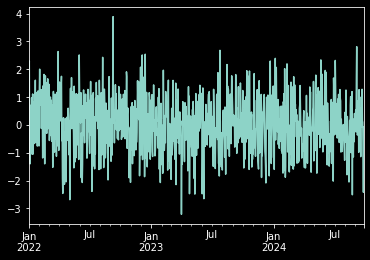

In [237]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2022", periods=1000))
ts.plot()

<AxesSubplot:>

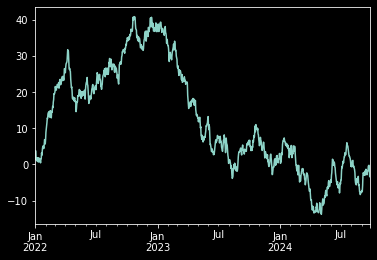

In [238]:
ts_cumsum = ts.cumsum()
ts_cumsum.plot()

If running under Jupyter Notebook, the plot will appear on `plot()`. Otherwise use `matplotlib.pyplot.show` to show it of `matplotlin.pyplot.savefig` to write it into a file.

In [239]:
plt.show()

On a DataFrame, the `plot()` method is a convenience to plot all of the columns with labels.

<Figure size 432x288 with 0 Axes>

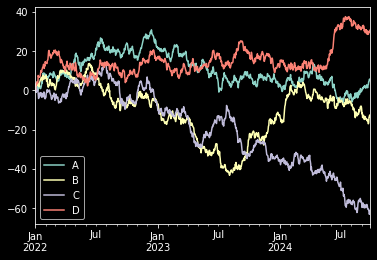

In [240]:
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=ts.index,
    columns=list("ABCD")
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

## Getting data in/out

### CSV

#### Writing to a .csv file

In [241]:
df.to_csv("files/foo.csv")

#### Reading from a .csv file

In [242]:
pd.read_csv("files/foo.csv")

,Unnamed: 0,A,B,C,D
0,2022-01-01,0.237550,0.073925,0.515042,0.202738
1,2022-01-02,0.806062,2.034120,2.909772,0.686370
2,2022-01-03,-0.137827,3.283412,1.702013,2.603926
3,2022-01-04,0.458282,2.172800,-0.987148,3.101006
4,2022-01-05,1.327961,2.453049,-0.091384,2.845967
...,...,...,...,...,...
995,2024-09-22,4.382596,-16.516348,-60.514301,29.207147
996,2024-09-23,4.497091,-13.559788,-61.829773,29.642834
997,2024-09-24,5.608438,-13.364169,-63.066168,29.591800
998,2024-09-25,5.787184,-12.512226,-62.526984,30.274558


### HDF5

Reading and writing to HDF5Stores.

#### Writing to a HDF5 Store.

In [243]:
# !pip install tables
df.to_hdf("files/foo.h5", "df")

#### Reading from HDF5 Store.

In [244]:
pd.read_hdf("files/foo.h5", "df")

,A,B,C,D
2022-01-01,0.237550,0.073925,0.515042,0.202738
2022-01-02,0.806062,2.034120,2.909772,0.686370
2022-01-03,-0.137827,3.283412,1.702013,2.603926
2022-01-04,0.458282,2.172800,-0.987148,3.101006
2022-01-05,1.327961,2.453049,-0.091384,2.845967
...,...,...,...,...
2024-09-22,4.382596,-16.516348,-60.514301,29.207147
2024-09-23,4.497091,-13.559788,-61.829773,29.642834
2024-09-24,5.608438,-13.364169,-63.066168,29.591800
2024-09-25,5.787184,-12.512226,-62.526984,30.274558


### Excel

Reading and writing to MS Excel.

#### Writing to an excel file

In [245]:
df.to_excel("files/foo.xlsx", sheet_name="Sheet1")

#### Reading from an excel file.

In [246]:
pd.read_excel("files/foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2022-01-01,0.237550,0.073925,0.515042,0.202738
1,2022-01-02,0.806062,2.034120,2.909772,0.686370
2,2022-01-03,-0.137827,3.283412,1.702013,2.603926
3,2022-01-04,0.458282,2.172800,-0.987148,3.101006
4,2022-01-05,1.327961,2.453049,-0.091384,2.845967
...,...,...,...,...,...
995,2024-09-22,4.382596,-16.516348,-60.514301,29.207147
996,2024-09-23,4.497091,-13.559788,-61.829773,29.642834
997,2024-09-24,5.608438,-13.364169,-63.066168,29.591800
998,2024-09-25,5.787184,-12.512226,-62.526984,30.274558
